## 1. Bar Charts

A `bar chart` depicts the distribution of a categorical variable. Each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on the level.

### Bar chart using `Seaborn`

#### Example 1. Create a vertical var chart using Seaborn, with deafult colors


In [ ]:
# Import the necesary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# magic command: it allows the plot to render directly inside the jupyter notebook
%matplotlib inline  

# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

sb.countplot(data = pokemon, x = 'generation_id') ; 
# A semicolon at the end of the statement will supress printing the plotting information

#### Example 2. Create a vertical bar chart using Seaborn, with a uniform single color

In [ ]:
# The `color_palette()` returns the the current / default palette as a list of RGB tuples. 
# Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. 
# Choose the first tuple of RGB colors

base_color = sb.color_palette()[0]

# Use the color argument
sb.countplot(data = pokemon, x ='generation_id', color = base_color);

### Bar Chart using the `Matplotlib` 

#### Example 3. Create a vertical bar chart using `Matplotlib`, with a uniform single color

In [ ]:
# First return the series having unique values
x = pokemon['generation_id'].unique()

# Return the series having frequency count of each unique value

y = pokemon['generation_id'].value_counts(sort=False)

plt.bar(x,y)

# Labeling the axis
plt.xlabel('generation_id')
plt.ylabel('count')
# Display the plpt
plt.show()

#### Example 4. Static and dynamic ordering of the bars in a bar chart using `seaborn.countplot()`

In [ ]:
# Static-ordering the bars
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = [5,1,3,4,2,7,6]);

# Dynamic-ordering the bars
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
freq = pokemon['generation_id'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

#### Example 5. Rotate the category labels (not axes)


In [ ]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation = 90);

#### Example 6. Rotate the axes clockwise

In [ ]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y= 'type_1', color = base_color, order = type_order);

## 2. Absolute Vs Relative Frequency 
By default, seaborn's `countplot` function will summarize and plot the data in terms of **absolute frequency**, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of the proportions of the whole. In this case, you will want to plot the data in terms of **relative frequency**, where the height indicates the proportion of data taking each level, rather than the absolute count.

### Example 1. Demonstrate data wrangling, and plot a horizontal bar chart.
#### Example 1 - Step 1. Make the necessary import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# Read the dataset

pokemon = pd.read_csv('pokemon.csv')

print(pokemon.shape)
pokemon.head(10)


#### Example 1 - Step 2. Data wrangling to reshape the pokemon dataframe using `pandas.DataFrame.melt()`

In [ ]:
pkmn_types = pokemon.melt(id_vars=['id','species'],
                         value_vars=['type_1','type_2'],
                         var_name='type_level',
                         value_name='type')
pkmn_types.head(10)

#### Example 1 - Step 3. Find the frequency of unique values in the type column

In [ ]:
# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = pkmn_types['type'].value_counts()
# And get the unique values of the 'type' column, in the decreasing order of the frequency
type_order = type_counts.index
type_order

#### Example 1 - Step 4. Plot the horizontal bar charts

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

### Example 2. Plot a bar chart having the proportions, instead of the actual count, on one of the axes.
#### Example 2 - Step 1. Find the maximum proportion of bar

In [ ]:
# Return the sum of all not-null values in 'type' column
n_pokemon = pkmn_types['type'].value_counts().sum()

#Return the highest frequency in the 'type' column 
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon

print(max_prop)

#### Example 2 - Step 2. Create an array of evenly spaced proportioned values

In [ ]:
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%
tick_props = np.arange(0, max_prop, 0.02)
tick_props

#### Example 2 - Step 3. Create a list of String values that can be used as tick labels.

In [ ]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

#### Example 2 - Step 4. Plot the bar chart, with new x-tick labels

In [ ]:
sb.countplot(data = pkmn_types, y = 'type', color=base_color, order = type_order);

plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

### 3. Additional Variation

#### Example 3. Print the text (proportion) on the bars of a horizontal plot.

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

#### Example 4. Print the text (proportion) below the bars of a Vertical plot.

In [ ]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

In [ ]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

## 3. Counting Missing Data 

If you have a large dataframe, and it contains a few missing values (`None or a numpy.NaN`), then you can find the count of such missing value across the given label. For this purpose, you can use either of the following two analogous functions :

**1. pandas.DataFrame.isna()**

**2. pandas.DataFrame.isnull()**

The functions above are alias of each other and detect missing values by returning the same sized object as that of the calling dataframe, made up of boolean True/False.

### Step 1 load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
# Original source of data: https://www.kaggle.com/manjeetsingh/retaildataset available under C0 1.0 Universal (CC0 1.0) Public Domain Dedication License
sales_data = pd.read_csv('sales-data.csv')
sales_data.head(10)

In [ ]:
sales_data.shape

In [ ]:
# Use either of the functions below
# sales_data.isna()
sales_data.isnull()

In [ ]:
sales_data.isna().sum()

### Step 2 - Prepare a NaN tabular data

In [ ]:
# Let's drop the column that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis = 1).isna().sum()
print(na_counts)

### Step 3 - Plot the bar chart from the NaN tabular data, and also print values on each bar

In [ ]:
# The first argument to the function below contains the x-values (column names), the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(na_counts.index.values, na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    plt.text(i, count+300, count, ha = 'center', va='top')

# 4. Pie Charts

A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable.
Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken. Use a Pie chart only when the number of categories is less, and you'd like to see the proportion of each category on a chart.

### Example 1: Plot a simple Pie chart

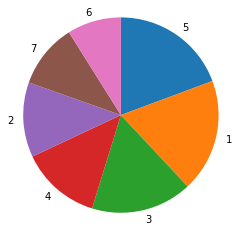

In [32]:
# Use  the same pokemon dataset
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');


#### TO DO
Did you notice the various arguments in the plt.pie() function? Particularly, the labels = sorted_counts.index argument represents a list of strings serving as labels for each wedge. In the example above, the labels have used the following list:

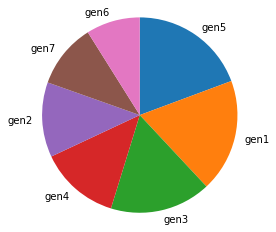

In [34]:
new_sorted_index = ['gen{}'.format(i) for i in sorted_counts.index]

plt.pie(sorted_counts, labels = new_sorted_index, startangle = 90, counterclock = False);
plt.axis('square');


### Example 2. Plot a simple Donut plot

(-1.1063354030102694,
 1.1197837798494124,
 -1.114763917050899,
 1.1113552658087829)

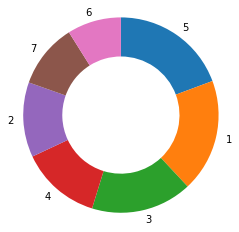

In [35]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width': 0.4});
plt.axis('square')

# 5. Histograms
A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot the histograms


### Example1. Plot a default Histogram 

(807, 14)


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

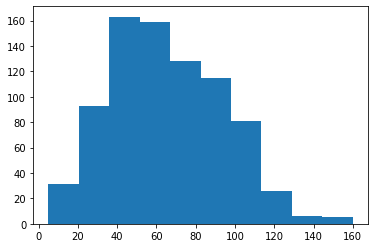

In [36]:
# import the neccessary libraires 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

# plot the deafult histogram 
plt.hist(data = pokemon, x = 'speed')

In [39]:
# You can use descriptive statistics (e.g. via dataframe['column'].describe())
#to gauge what minimum and maximum bin limits might be appropriate for the plot
pokemon['speed'].describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

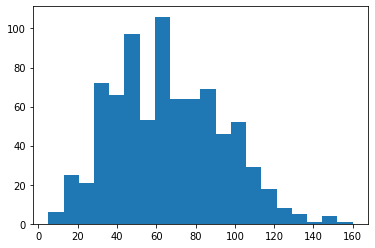

In [40]:
# Histogram with fixed number of bins 
plt.hist(data = pokemon, x = 'speed', bins = 20)

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160], dtype=int64),
 <BarContainer object of 32 artists>)

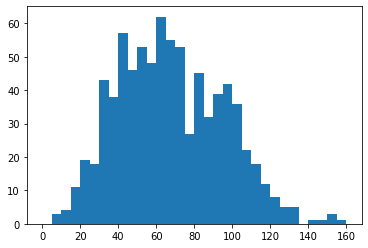

In [41]:
# Histogram with dynamic number of bins
# Create bins with step-size 5
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

### Example 2. Plot the similar histogram with Seaborn's `distplot()`

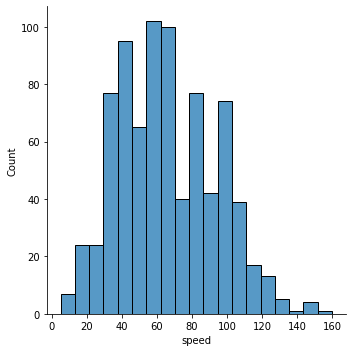

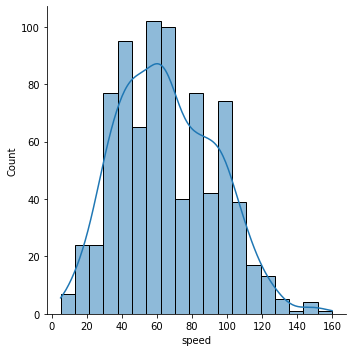

In [46]:
sb.displot(pokemon['speed'])
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sb.displot(pokemon['speed'], kde = True)

C:\Users\user\AppData\Local\Temp/ipykernel_8752/3120789597.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,hist_kws = {'alpha' : 1})


<AxesSubplot:xlabel='speed'>

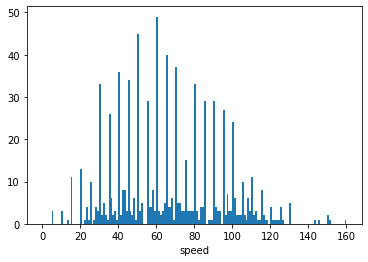

In [51]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins = bin_edges, kde = False,hist_kws = {'alpha' : 1})

## Example 3. Plot two histograms side-by-side

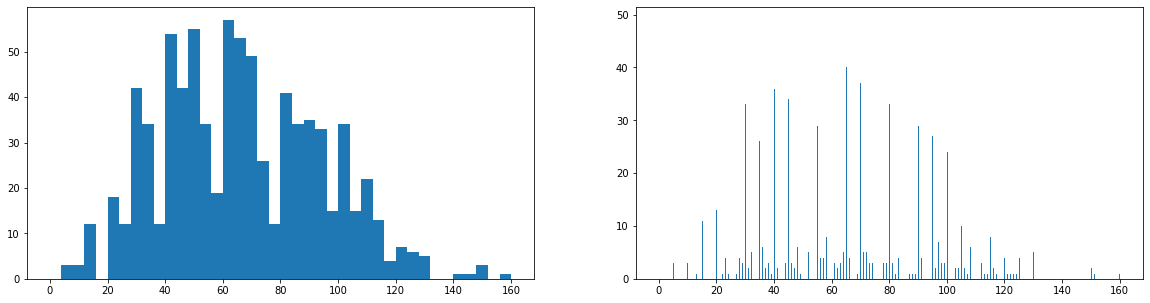

In [52]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);